In [2]:
from MonteCarloSimulator.montecarlo import *

Welcome to the Monte Carlo Simulator!!


# SCENARIO 1

### 1. Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.

In [3]:
fair = Die(['H','T'])
unfair = Die(['H','T'])
unfair.changeWeight('H',5)

print(fair.showCurrent())
print(unfair.showCurrent())

  faces  weights
0     H      1.0
1     T      1.0
  faces  weights
0     H      5.0
1     T      1.0


### 2. Play a game of 1000 flips of three coins with all fair dice.

In [4]:
nroll = 1000
fairGame = Game([fair, fair, fair])
fairGame.play(nroll)
fairGame.show().head(10)

,0,1,2
rollNumber,,,
1,T,T,T
2,T,H,T
3,T,T,T
4,H,T,T
5,H,T,T
6,T,T,H
7,H,H,H
8,T,T,T
9,T,T,H


### 3. Play a game of 1000 flips with two unfair dice and one fair die.

In [5]:
unfairGame = Game([unfair, unfair, fair])
unfairGame.play(nroll)
unfairGame.show().head(10)

,0,1,2
rollNumber,,,
1,H,H,T
2,H,H,T
3,H,H,T
4,H,T,H
5,H,H,H
6,H,H,H
7,H,H,T
8,H,T,T
9,H,H,H


### 4. For each game, use an Analyzer object to determine the relative frequency of jackpots - getting either all Hs or all Ts.

In [6]:
fairGameAnalyzer = Analyzer(fairGame)
fairGameJackpot = fairGameAnalyzer.jackpot()

unfairGameAnalyzer = Analyzer(unfairGame)
unfairGameJackpot = unfairGameAnalyzer.jackpot()

print(fairGameJackpot)
print(unfairGameJackpot)

254
362


### 5. Compute relative frequency as the number of jackpots over the total number of rolls.

In [7]:
fairGameFrequencies = fairGameJackpot/nroll
unfairGameFrequencies = unfairGameJackpot/nroll
print(fairGameFrequencies)
print(unfairGameFrequencies)

0.254
0.362


### 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

<function matplotlib.pyplot.show(close=None, block=None)>

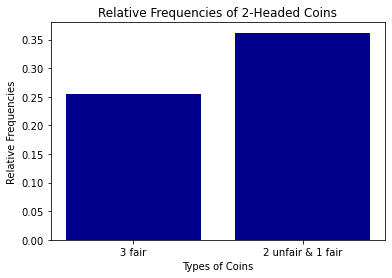

In [8]:
data = {'3 fair':fairGameFrequencies, '2 unfair & 1 fair':unfairGameFrequencies}
games = list(data.keys())
values = list(data.values())
plt.bar(games, values, color = "darkblue")
plt.xlabel("Types of Coins")
plt.ylabel("Relative Frequencies")
plt.title("Relative Frequencies of 2-Headed Coins")
plt.show

# SCENARIO 2

### 1. Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will  weight 1 five times more than the others.

In [11]:
fair = Die([1,2,3,4,5,6])
unfair1 = Die([1,2,3,4,5,6])
unfair2 = Die([1,2,3,4,5,6])
unfair1.changeWeight(6,5)
unfair2.changeWeight(1,5)

print(fair.showCurrent())
print(unfair1.showCurrent())
print(unfair2.showCurrent())

   faces  weights
0      1      1.0
1      2      1.0
2      3      1.0
3      4      1.0
4      5      1.0
5      6      1.0
   faces  weights
0      1      1.0
1      2      1.0
2      3      1.0
3      4      1.0
4      5      1.0
5      6      5.0
   faces  weights
0      1      5.0
1      2      1.0
2      3      1.0
3      4      1.0
4      5      1.0
5      6      1.0


### 2. Play a game of 10000 rolls with 5 fair dice.

In [12]:
nroll = 10000
fairGame = Game([fair, fair, fair, fair, fair])
fairGame.play(nroll)
fairGame.show().head(10)


,0,1,2,3,4
rollNumber,,,,,
1,2,3,4,5,6
2,2,1,1,4,1
3,3,6,3,3,2
4,4,2,3,6,2
5,3,3,1,4,4
6,2,4,4,5,2
7,6,2,6,4,1
8,2,3,3,3,3
9,5,3,4,5,4


### 3. Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.

In [13]:
unfairGame = Game([unfair1, unfair1, unfair2, fair, fair])
unfairGame.play(nroll)
unfairGame.show().head(10)

,0,1,2,3,4
rollNumber,,,,,
1,5,6,5,4,1
2,3,6,1,2,2
3,6,6,1,4,4
4,5,6,6,6,3
5,6,6,1,5,4
6,6,6,1,4,3
7,4,6,3,2,1
8,3,2,5,1,6
9,2,6,6,4,6


### 4. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

<function matplotlib.pyplot.show(close=None, block=None)>

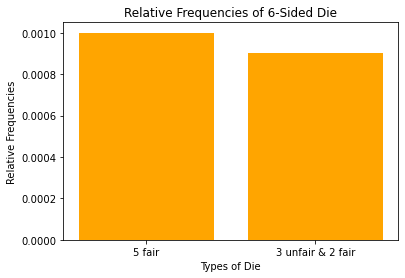

In [14]:
fairGameAnalyzer = Analyzer(fairGame)
fairGameJackpot = fairGameAnalyzer.jackpot()
unfairGameAnalyzer = Analyzer(unfairGame)
unfairGameJackpot = unfairGameAnalyzer.jackpot()

data = {'5 fair':fairGameJackpot/nroll, '3 unfair & 2 fair':unfairGameJackpot/nroll}
games = list(data.keys())
values = list(data.values())
plt.bar(games, values, color="orange")
plt.xlabel("Types of Die")
plt.ylabel("Relative Frequencies")
plt.title("Relative Frequencies of 6-Sided Die")
plt.show

### 5. Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

<function matplotlib.pyplot.show(close=None, block=None)>

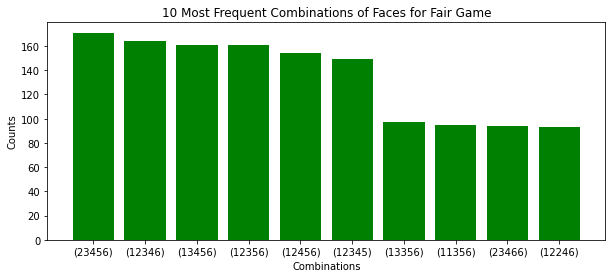

In [17]:
fairGameAnalyzer.combo()
fairGameCombos = fairGameAnalyzer.comboDF
fairGameCombos = fairGameCombos[:10]
indices = pd.DataFrame(fairGameCombos.index)
stringlist = []
for i in range(10):
    stringlist.append((str(indices[0][i])).replace(', ', ''))
fairGameCombos['stringlist']=stringlist

plt.figure(figsize=(10, 4))
plt.bar(list(fairGameCombos['stringlist'].values), list(fairGameCombos['frequencies'].values), color="green")
plt.xlabel("Combinations")
plt.ylabel("Counts")
plt.title("10 Most Frequent Combinations of Faces for Fair Game")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

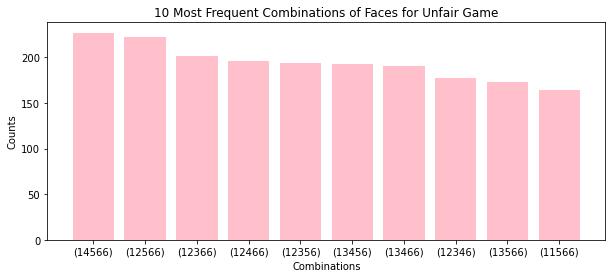

In [18]:
unfairGameAnalyzer.combo()
unfairGameCombos = unfairGameAnalyzer.comboDF
unfairGameCombos = unfairGameCombos[:10]
indices = pd.DataFrame(unfairGameCombos.index)
stringlist = []
for i in range(10):
    stringlist.append((str(indices[0][i])).replace(', ', ''))
unfairGameCombos['stringlist']=stringlist

plt.figure(figsize=(10, 4))
plt.bar(list(unfairGameCombos['stringlist'].values), list(unfairGameCombos['frequencies'].values), color="pink")
plt.xlabel("Combinations")
plt.ylabel("Counts")
plt.title("10 Most Frequent Combinations of Faces for Unfair Game")
plt.show

# SCENARIO 3

### 1. Create a "die" of letters from a to z with weights based on their frequency of usage.

In [24]:
letters_dict = {'A': 8.4966, 'B': 2.0720, 'C': 4.5388, 'D ': 3.3844, 'E': 11.1607,
'F': 1.8121, 'G': 4.4705, 'H': 3.0034, 'I': 7.5448, 'J': 0.1965,
'K': 1.1016, 'L': 5.4893, 'M': 3.0129, 'N': 6.6544, 'O': 7.1635, 
'P': 3.1671, 'Q': 0.1962, 'R': 7.5809, 'S': 5.7351, 'T': 6.9509,
'U': 3.6308, 'V': 1.0074, 'W': 1.2899, 'X': 0.2902, 'Y': 1.7779, 'Z': 0.2722}

letterDice = Die(list(letters_dict.keys()))
for each in list(letters_dict.keys()):
    letterDice.changeWeight(each,letters_dict.get(each))

letterDice.showCurrent()

,faces,weights
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607
5,F,1.8121
6,G,4.4705
7,H,3.0034
8,I,7.5448
9,J,0.1965


### 2. Play a game involving 5 of these dice with 1000 rolls.

In [25]:
letterGame = Game([letterDice, letterDice, letterDice, letterDice, letterDice])
letterGame.play(1000)
letterGame.show().head(10)

,0,1,2,3,4
rollNumber,,,,,
1,E,E,M,O,N
2,S,I,G,L,K
3,E,W,I,U,M
4,L,C,R,S,P
5,A,N,F,S,I
6,P,L,G,U,Z
7,C,A,G,E,O
8,P,L,H,N,I
9,D,H,A,S,O


### 3. How many combos can you get that look like actual English words?

In [26]:
letterDF = letterGame.show()
letterDF['potentialWords'] = letterDF[0] + letterDF[1] + letterDF[2] + letterDF[3] + letterDF[4]

dict = enchant.Dict("en_US")
english_words = []
for i in letterDF['potentialWords']:
    if dict.check(i)==True:
        english_words.append(i)
english_words

['HEARS', 'OGRES', 'IOTAS', 'RELIC', 'FRAYS']

### 4. Based on your eye count, what is the relative frequency of these words versus the rest?

In [27]:
len(english_words) / len(letterDF)


0.005